# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
               
        # Increase counter by one 
        record= record + 1
          
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Huejucar
Processing Record 2 | Laguna
Processing Record 3 | Pokhara
City not found. Skipping...
Processing Record 4 | Kodiak
Processing Record 5 | Nikolskoye
City not found. Skipping...
Processing Record 6 | Rome
Processing Record 7 | Punta Arenas
Processing Record 8 | Albany
Processing Record 9 | Tasiilaq
Processing Record 10 | Kerema
Processing Record 11 | Samana
Processing Record 12 | Khatanga
Processing Record 13 | Longyearbyen
Processing Record 14 | Ngunguru
Processing Record 15 | Cochrane
Processing Record 16 | Springbok
Processing Record 17 | Vardo
City not found. Skipping...
Processing Record 18 | Hami
Processing Record 19 | Arraial do Cabo
Processing Record 20 | Rikitea
Processing Record 21 | Saint-Pierre
Processing Record 22 | Pop
City not found. Skipping...
Processing Record 23 | Viedma
Processing Record 24 | Pangody
Processing Record 25 | Ushuaia
Processing Record 26 | Busselton
City not found. S

City not found. Skipping...
Processing Record 221 | Alofi
Processing Record 222 | Pangnirtung
Processing Record 223 | Yeppoon
Processing Record 224 | Hovd
Processing Record 225 | Hobyo
Processing Record 226 | Mahebourg
Processing Record 227 | San Carlos de Bariloche
Processing Record 228 | Abalak
Processing Record 229 | Kuytun
Processing Record 230 | Barabai
City not found. Skipping...
Processing Record 231 | Vestmanna
Processing Record 232 | Parkersburg
Processing Record 233 | Mazabuka
Processing Record 234 | Cuddapah
Processing Record 235 | Doka
Processing Record 236 | Chapais
Processing Record 237 | Ibra
Processing Record 238 | Filingue
City not found. Skipping...
Processing Record 239 | Salitral
Processing Record 240 | Kapuskasing
City not found. Skipping...
Processing Record 241 | Mirnyy
Processing Record 242 | Nola
Processing Record 243 | Yerbogachen
Processing Record 244 | Half Moon Bay
Processing Record 245 | Bolotnoye
Processing Record 246 | Sragen
Processing Record 247 | Avar

Processing Record 441 | Hammerfest
Processing Record 442 | Vostok
Processing Record 443 | Springdale
Processing Record 444 | Acapulco
Processing Record 445 | Cururupu
Processing Record 446 | Dandong
Processing Record 447 | El Cobre
Processing Record 448 | Pedasi
Processing Record 449 | Amapa
Processing Record 450 | Shirokiy
Processing Record 451 | Constantine
City not found. Skipping...
City not found. Skipping...
Processing Record 452 | Nyurba
Processing Record 453 | Komsomolskiy
Processing Record 454 | Mount Isa
Processing Record 455 | Tiznit
Processing Record 456 | Nyagan
Processing Record 457 | Limbang
Processing Record 458 | Luderitz
Processing Record 459 | Pyapon
Processing Record 460 | Marrakesh
Processing Record 461 | Faanui
Processing Record 462 | Kuznechnoye
Processing Record 463 | Lunino
Processing Record 464 | Saint-Francois
City not found. Skipping...
Processing Record 465 | Burnie
City not found. Skipping...
Processing Record 466 | Zemio
Processing Record 467 | Filadelfia

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [5]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Huejucar,70,MX,1558905148,17,22.35,-103.22,87.04,9.55
1,Laguna,40,MX,1558905149,29,27.52,-110.01,87.80,10.29
2,Pokhara,0,NP,1558905149,36,28.21,83.99,54.46,5.55
3,Kodiak,40,US,1558905150,34,39.95,-94.76,82.99,6.93
4,Nikolskoye,90,RU,1558905150,87,59.70,30.79,51.01,4.47


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

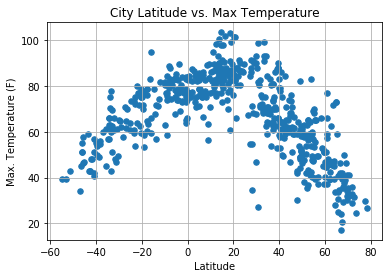

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

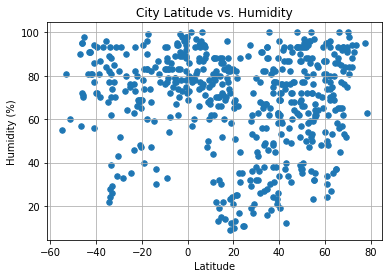

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

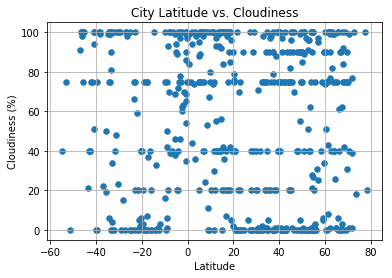

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

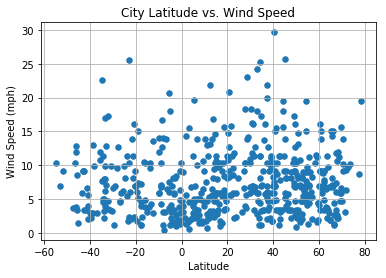

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()